<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>

<i><b>Parcial 2
<br>
<i><b>Ingeniero en formación:</b></i> 
<br>
<i><b>Shelsy Rodriguez
<br>
<i><b>Docente:</b></i> John Corredor, PhD.
<br>
<i><b>Asignatura:</b></i> Metricas de rendimiento - HPC
<br>
20/10/22
<br>
</FONT>
</div>

### 1. Se importan los modulos que se van a usar en la implementacion

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### 2. Se importa el dataset sobre el que se hara el desarrollo de la regresión logistica

In [27]:
df = pd.read_csv('/home/shelsy/Documentos/HPC_2/Parcial2/adult_data.csv')

El conjunto de datos presenta si los ingresos de las personas exceden los $50K/año según los datos del censo

In [28]:
# Se visualiza el df
df.head()

,39,0,77516,0.1,13,0.2,0.3,0.4,0.5,0.6,2174,0.7,40,0.8,0.9
0,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
1,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
2,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
3,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0
4,37,2,284582,3,14,1,1,2,0,1,0,0,40,0,0


Nos podemos dar cuenta que el df no cuenta con cabecera, por lo que debemos agregar el nombre de las columnas

In [29]:
# leer el df y ponerle nombre a las columnas
from operator import index


df = pd.read_csv('/home/shelsy/Documentos/HPC_2/Parcial2/adult_data.csv', 
                names = ["age","workclass", "fnlwgt", "education", "education-num", "marital-status",
                        "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                        "hours-per-week", "native-country",'salary'])


In [30]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


### 3. EDA - Analisis exploratorio de datos

In [31]:
df.shape

(30162, 15)

> el dataframe cuenta con 30.162 filas y 15 columnas

In [32]:
# Se visualiza el nombre de las columnas
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [33]:
# Se visualiza una pequeña descriocion de cada variable,
# la cantidad de valores, el promedio, la desviacion estandar, 
# los quartiles, el minimo y el maximo
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30162.0,38.437902,13.134665,17.0,28.00,37.0,47.0,90.0
workclass,30162.0,2.109343,0.934785,0.0,2.00,2.0,2.0,6.0
fnlwgt,30162.0,189793.833930,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0
education,30162.0,3.424607,3.479777,0.0,1.00,2.0,5.0,15.0
education-num,30162.0,10.121312,2.549995,1.0,9.00,10.0,13.0,16.0
marital-status,30162.0,1.075061,1.217557,0.0,0.00,1.0,1.0,6.0
occupation,30162.0,4.615609,3.432195,0.0,1.00,4.0,8.0,13.0
relationship,30162.0,1.523971,1.431980,0.0,0.00,1.0,3.0,5.0
race,30162.0,0.211823,0.612461,0.0,0.00,0.0,0.0,4.0
sex,30162.0,0.324315,0.468126,0.0,0.00,0.0,1.0,1.0


In [34]:
# Se visualida informacion de las columnas
# el tipo de dato, la cantidad de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int64
 2   fnlwgt          30162 non-null  int64
 3   education       30162 non-null  int64
 4   education-num   30162 non-null  int64
 5   marital-status  30162 non-null  int64
 6   occupation      30162 non-null  int64
 7   relationship    30162 non-null  int64
 8   race            30162 non-null  int64
 9   sex             30162 non-null  int64
 10  capital-gain    30162 non-null  int64
 11  capital-loss    30162 non-null  int64
 12  hours-per-week  30162 non-null  int64
 13  native-country  30162 non-null  int64
 14  salary          30162 non-null  int64
dtypes: int64(15)
memory usage: 3.5 MB


> Podemos observar que no hay valores nulos y todas las vareiables son de tipo numerico

Graficas para visualizar los datos

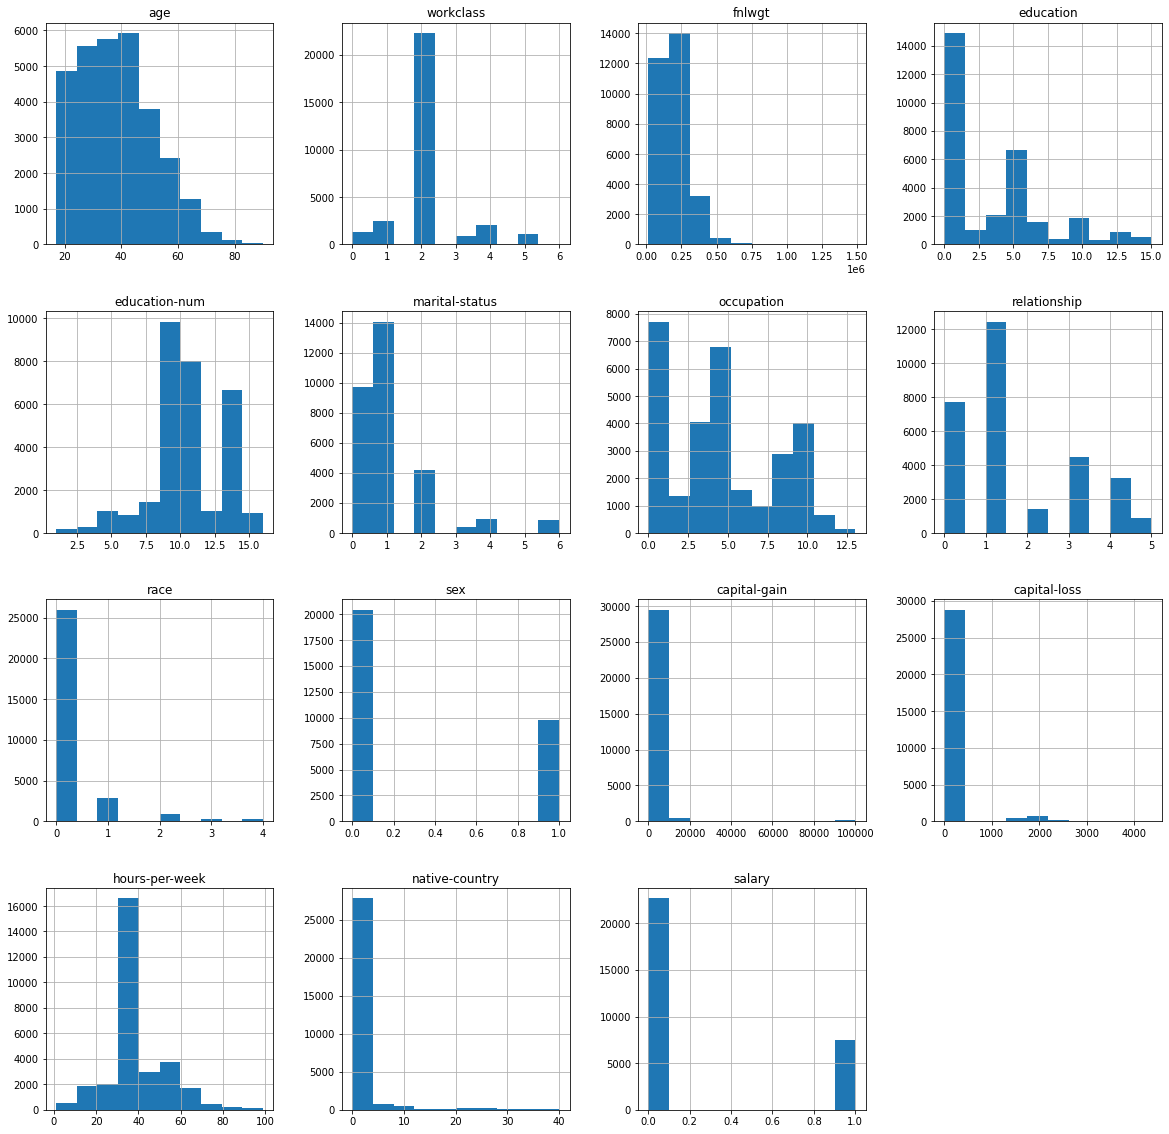

In [50]:
# histograma de las variables
# para ver la distribucion de los datos
df.hist(figsize=(20,20))
plt.show()

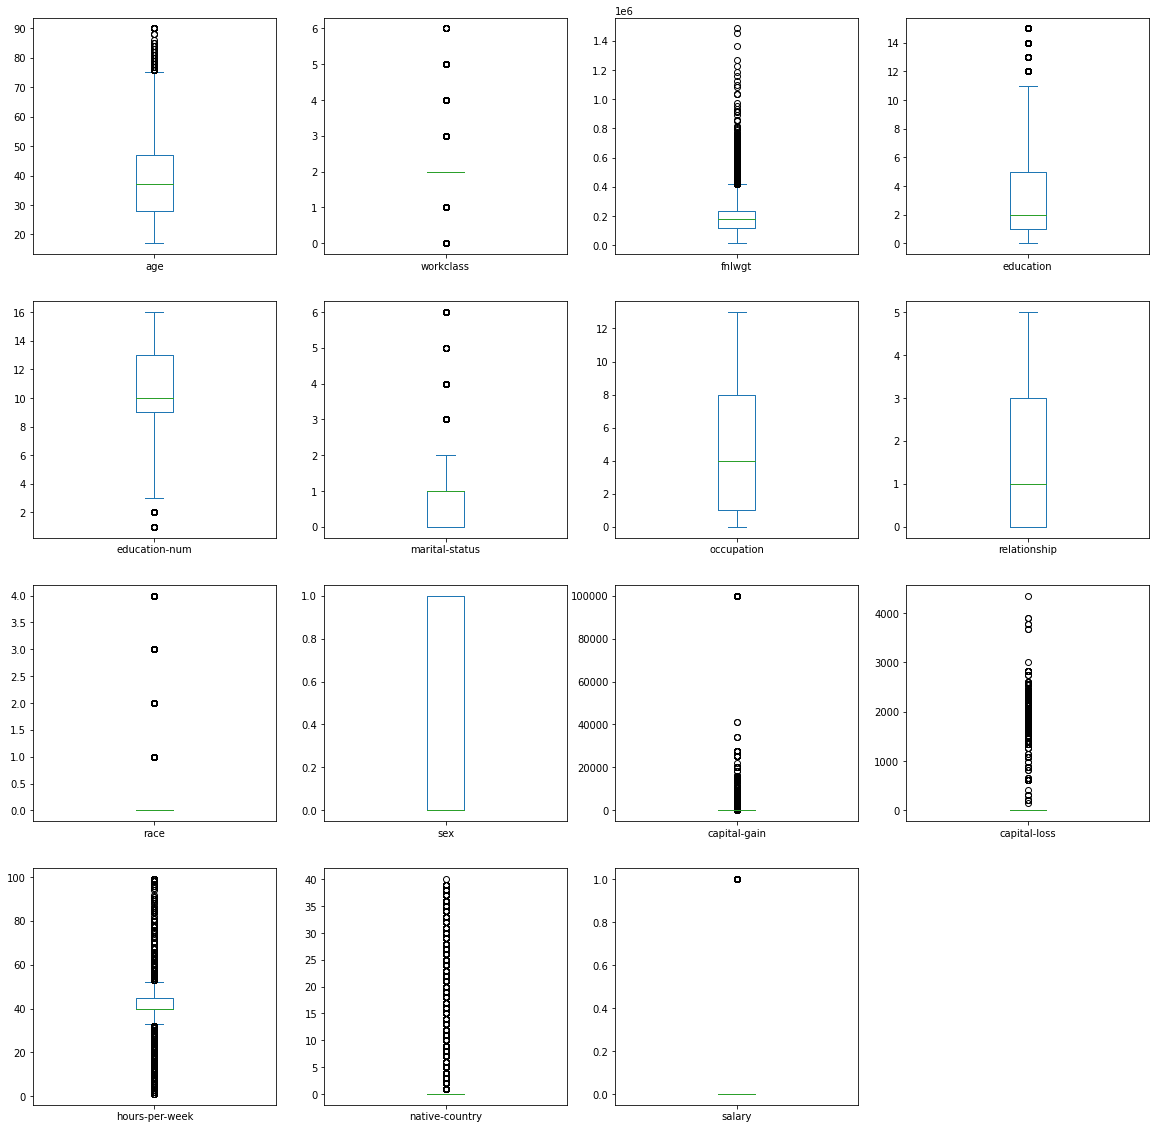

In [53]:
# grafico de cajas y bigotes para representar la distribucion de las variables
# y visualizar los outliers(los puntos que se salen de la distribucion)
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))
plt.show()

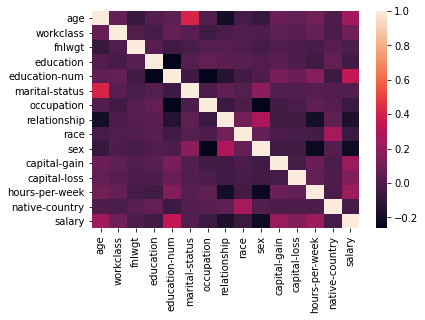

In [54]:
# matriz de correlacion para ver la relacion que existe entre las variables
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

### 4. Normalizamos los datos

In [35]:
# normalizar los datos
le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])

### 5. Separa los datos para el entrenamiento

In [36]:
# Variables independientes
# se elimina la columna salary
X = df.drop('salary', axis=1)

# variable objetivo -> salary, ya que es lo que vamos a predecir
y = df['salary']

In [37]:
# verificamos que la variable 'Salary' ya no esta en el conjunto de datos de entrada
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
print('Tamaño de X_train: ',X_train.shape)
print('Tamaño de X_test: ',X_test.shape)
print('Tamaño de y_train: ',y_train.shape)
print('Tamaño de y_test: ',y_test.shape)

Tamaño de X_train:  (21113, 14)
Tamaño de X_test:  (9049, 14)
Tamaño de y_train:  (21113,)
Tamaño de y_test:  (9049,)


### 6. Entrenar el modelo

In [40]:
# Entrenamiento del modelo de regresion logistica
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/shelsy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
# predice la variable objetivo
y_pred = logreg.predict(X_test)

In [49]:
logreg.score(X, y)

0.7822757111597374

### 7. Se aplican metricas de rendimiento para evaluar el modelo

In [42]:
# Se calcula la matriz de confusion con el objetivo
# de evaluar el desempeño del modelo con metricas
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6464  303]
 [1707  575]]


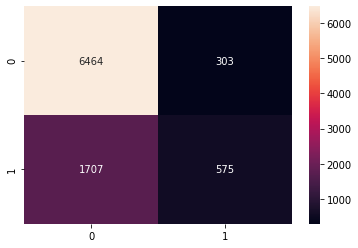

In [43]:
# grafica la matriz de confusion para una mejor visualizacion
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

In [44]:
# calcula accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.7778760083987181


In [45]:
# calcula la precision
precision_score(y_test, y_pred, average='macro')

0.7229939680558137

In [46]:
# calcula el recall
recall_score(y_test, y_pred, average='macro')

0.6035979175114785

In [47]:
# calcula el f1-score
f1_score(y_test, y_pred, average='macro')

0.6146839425744554

### 8. Conclusiones

### 9. Referencias

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* https://www.cienciadedatos.net/documentos/py17-regresion-logistica-python.html#:~:text=La%20regresi%C3%B3n%20log%C3%ADstica%20es%20un,de%20modelos%20de%20clasificaci%C3%B3n%20binaria.

* https://aprendeia.com/algoritmo-regresion-logistica-machine-learning-practica-con-python/
